# Student Name- Taslima Akter
StudentID-3040384

# Import Python Packages

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error, r2_score

# Loading Regression Data

In [2]:
#Import the datafile
from sklearn.datasets import load_diabetes
diabetes_df =  load_diabetes(as_frame=True).frame
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# Univariate Linear Regression
(Grab appropriate features and data split)

In [3]:
bmi = np.array(diabetes_df["bmi"])
target = np.array(diabetes_df["target"])
x=bmi
y=target
X_y_df = pd.DataFrame(np.array(np.transpose([x, y])), columns=["x_bmi","y_target"])
X_y_df

,x_bmi,y_target
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
...,...,...
437,0.019662,178.0
438,-0.015906,104.0
439,-0.015906,132.0
440,0.039062,220.0


In [4]:
#Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=0,shuffle=False)

## Normal Equation-Training Dataset
(fit and predict the normal equation)

In [5]:
#Training Dataset
x_reshaped=x_train.reshape(-1, 1)
reg = LinearRegression().fit(x_reshaped, y_train)

In [7]:
#Training Data
training_set = x_reshaped
h_w_x = reg.predict(training_set)
h_w_x_df = pd.DataFrame(np.array(np.transpose([training_set[:,0], h_w_x])),columns=["x", "predicted_y"])
h_w_x_df

,x,predicted_y
0,0.061696,211.143800
1,-0.051474,102.753615
2,0.044451,194.627200
3,-0.011595,140.948252
4,-0.036385,117.205640
...,...,...
348,-0.020218,132.689952
349,-0.057941,96.559890
350,0.060618,210.111512
351,-0.040696,113.076490


# Plot Regression Graph

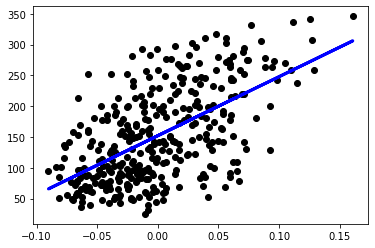

In [8]:
#Training Data
plt.scatter(x_reshaped[:,0], y_train, color="black")
plt.plot(x_reshaped[:,0], h_w_x, color="blue", linewidth=3)

### mse and rsquared (Training set)

In [9]:
#Training Data(your mse should be lower than 4000.0 and your rsquared should be above 0.30)
mse = mean_squared_error(y_train, h_w_x)
r2 = r2_score(y_train, h_w_x)
# Using math.floor here because the mse was basically 0 so I'm cleaning it up (You dont need to use math.floor in your own implementation)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 3842, r2: 0.3378550554042947


# Normal Equation-Testing Dataset

(fit and predict the normal equation)

In [10]:
#reshaped testing dataset
x_reshaped=x_test.reshape(-1, 1)
reg = LinearRegression().fit(x_reshaped, y_test)

In [11]:
#testing dataset
testing_set = x_reshaped
h_w_x = reg.predict(testing_set)
h_w_x_df = pd.DataFrame(np.array(np.transpose([testing_set[:,0], h_w_x])),columns=["x", "predicted_y"])
h_w_x_df

,x,predicted_y
0,-0.055785,101.020061
1,0.045529,194.574125
2,-0.009439,143.816069
3,-0.033151,121.920437
4,0.049840,198.555149
...,...,...
84,0.019662,170.687981
85,-0.015906,137.844533
86,-0.015906,137.844533
87,0.039062,188.602589


# mse and rsquared (Testing set)

In [12]:
#testing dataset(your mse should be lower than 4500.0 and your rsquared should be above 0.30)
mse = mean_squared_error(y_test, h_w_x)
r2 = r2_score(y_test, h_w_x)

# Using math.floor here because the mse was basically 0 so I'm cleaning it up (You dont need to use math.floor in your own implementation)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 4076, r2: 0.36521875730552655


### Plot Regression Graph(Testing data)

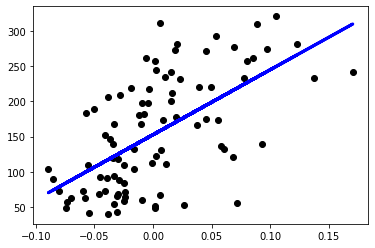

In [13]:
plt.scatter(x_reshaped[:,0], y_test, color="black")
plt.plot(x_reshaped[:,0], h_w_x, color="blue", linewidth=3)

## Gradient descent -Training Data
(fit and predict gradient descent)

In [22]:
#reshape training dataset
x_train=x_train.reshape(-1,1)

In [23]:
#training dataset
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=30000, tol=1e-3, random_state=0, penalty='none').fit(x_train, y_train)

In [24]:
#training dataset
training_set_sgd = x_train
h_w_x = sgd.predict(training_set_sgd)
h_w_x_df = pd.DataFrame(np.array(np.transpose([training_set_sgd[:,0], h_w_x])),columns=["x", "predicted_y"])
h_w_x_df

,x,predicted_y
0,0.061696,203.209825
1,-0.051474,109.225678
2,0.044451,188.888431
3,-0.011595,142.343901
4,-0.036385,121.756898
...,...,...
348,-0.020218,135.183205
349,-0.057941,103.855156
350,0.060618,202.314738
351,-0.040696,118.176549


In [25]:
#training dataset(your mse should be lower than 4000.0 and your rsquared should be above 0.30)
mse = mean_squared_error(y_train, h_w_x)
r2 = r2_score(y_train, h_w_x)

# Using math.floor here because the mse was basically 0 so I'm cleaning it up (You dont need to use math.floor in your own implementation)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 3877, r2: 0.33188690378091246


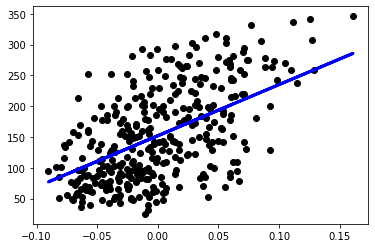

In [26]:
#training dataset
plt.scatter(training_set_sgd[:,0], y_train, color="black")
plt.plot(training_set_sgd[:,0], h_w_x, color="blue", linewidth=3)

# Gradient descent -Test Data

(fit and predict gradient descent)


In [27]:
#testing dataset
x_test=x_test.reshape(-1,1)

In [28]:
#testing dataset
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=30000, tol=1e-3, random_state=0, penalty='none').fit(x_test, y_test)

In [30]:
#testing dataset
test_set_sgd = x_test
h_w_x = sgd.predict(test_set_sgd)
h_w_x_df = pd.DataFrame(np.array(np.transpose([test_set_sgd[:,0], h_w_x])),columns=["x", "predicted_y"])
h_w_x_df

,x,predicted_y
0,-0.055785,107.583674
1,0.045529,189.713305
2,-0.009439,145.153612
3,-0.033151,125.931783
4,0.049840,193.208183
...,...,...
84,0.019662,168.744038
85,-0.015906,139.911295
86,-0.015906,139.911295
87,0.039062,184.470988


### mse and rsquared (Testing set)

In [31]:
#testing dataset(your mse should be lower than 4500.0 and your rsquared should be above 0.30)
mse = mean_squared_error(y_test, h_w_x)
r2 = r2_score(y_test, h_w_x)

# Using math.floor here because the mse was basically 0 so I'm cleaning it up (You dont need to use math.floor in your own implementation)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 4111, r2: 0.3597725103827535


# Plot Regression graph-Testing data

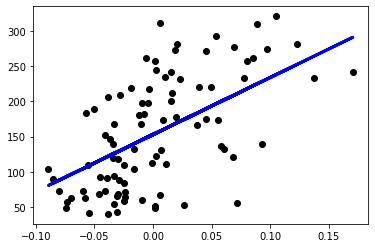

In [32]:
plt.scatter(test_set_sgd[:,0], y_test, color="black")
plt.plot(test_set_sgd[:,0], h_w_x, color="blue", linewidth=3)

# Multivariate Linear Regression
(Grab appropriate features and data split)

In [34]:
#Assign the data to variable
feature_cols1 = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X = diabetes_df[feature_cols1]
y = diabetes_df['target']

## No feature scaling

In [35]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

## Fit and predict Normal Equation-Training Dataset

In [36]:
#Training Dataset
#x_train=x_train.reshape(-1,1)
reg = LinearRegression().fit(x_train, y_train)
training_set = x_train
h_w_x = reg.predict(training_set)

### mse and rsquared (Training set)

In [37]:
#Training Dataset(your mse should be lower than 3000.0 and your rsquared should be above 0.50)
mse = mean_squared_error(y_train, h_w_x)
r2 = r2_score(y_train, h_w_x)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2909, r2: 0.5104632995430749


# Fit and predict Normal Equation-Testing Dataset

In [38]:
#Testing Dataset
#x_test=x_test.reshape(-1,1)
reg = LinearRegression().fit(x_test, y_test)
testing_set = x_test
h_w_x = reg.predict(testing_set)

### mse and rsquared (Testing set)

In [39]:
#Testing Dataset(your mse should be lower than 3000.0 and your rsquared should be above 0.50)
mse = mean_squared_error(y_test, h_w_x)
r2 = r2_score(y_test, h_w_x)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2347, r2: 0.6003067185668471


## Fit and predict Gradient Descent (without feature scaling)-Training dataset

In [40]:
#Training Dataset
sgd = SGDRegressor(max_iter=150000, tol=1e-3, random_state=0, penalty='none').fit(x_train, y_train)

### mse and rsquared (Training set) No feature scaling

In [41]:
#Training Dataset
training_set_sgd = x_train
h_w_x = sgd.predict(training_set_sgd)

In [42]:
#training data-your mse should be lower than 3000.0 and your rsquared should be above 0.50
mse = mean_squared_error(y_train, h_w_x)
r2 = r2_score(y_train, h_w_x)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2970, r2: 0.500074572416081


# Fit and predict Gradient Descent (without feature scaling)-Testing dataset

In [43]:
#Testing Dataset
sgd = SGDRegressor(max_iter=100000, tol=1e-3, random_state=0, penalty='none').fit(x_test, y_test)

In [44]:
#Testing Dataset
testing_set_sgd = x_test
h_w_x = sgd.predict(testing_set_sgd)

### mse and rsquared (Testing set) No feature scaling

In [45]:
#Testing Dataset(your mse should be lower than 3500.0 and your rsquared should be above 0.50)
mse = mean_squared_error(y_test, h_w_x)
r2 = r2_score(y_test, h_w_x)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2447, r2: 0.5832753921150028


## Feature scaling-Training Data
(Feature scale your data here)

In [46]:
#Assign the data to variable-training data
feature_cols2 = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X = diabetes_df[feature_cols2]
y = diabetes_df['target']

In [47]:
#Split the dataset-training data
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [48]:
#Training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)
training_set_x_fs = scaler.transform(x_train)
testing_set_x_fs = scaler.transform(x_test)

# Fit and predict Gradient Descent (with feature scaling)-training Dataset

In [49]:
#training dataset
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=10000, tol=1e-3, random_state=0, penalty='none').fit(training_set_x_fs, y_train)

In [50]:
#training dataset
training_set_sgd = training_set_x_fs
h_w_x = sgd.predict(training_set_sgd)

# mse and rsquared (Training set) feature scaling

In [51]:
#training dataset(your mse should be lower than 3000.0 and your rsquared should be above 0.50)
mse = mean_squared_error(y_train, h_w_x)
r2 = r2_score(y_train, h_w_x)

# Using math.floor here because the mse was basically 0 so I'm cleaning it up (You dont need to use math.floor in your own implementation)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2881, r2: 0.5111530997570571


# Fit and predict Gradient Descent (with feature scaling)-Testing Dataset

In [52]:
#training dataset
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=25000, tol=1e-3, random_state=0, penalty='none').fit(testing_set_x_fs, y_test)

In [53]:
#training dataset
testing_set_sgd = testing_set_x_fs
h_w_x = sgd.predict(testing_set_sgd)

# mse and rsquared (Testing set) feature scaling

In [54]:
#your mse should be lower than 3000.0 and your rsquared should be above 0.50)
mse = mean_squared_error(y_test, h_w_x)
r2 = r2_score(y_test, h_w_x)

# Using math.floor here because the mse was basically 0 so I'm cleaning it up (You dont need to use math.floor in your own implementation)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2576, r2: 0.5733795359733894


# Loading Classification data

In [55]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
iris_df =  load_iris(as_frame=True).frame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Binary Logistic Classification

(Grab appropriate features and data split)
## No Feature Scaling

In [62]:
import copy
iris_df_copy = copy.deepcopy(iris_df)

# Shuffle data
iris_df_copy = iris_df.sample(frac=1, random_state=0).reset_index(drop=True)

# Grab appropriate columns
sepal_length_width = np.array(iris_df_copy[["sepal length (cm)", "sepal width (cm)"]])

# Change class 2 to class 0 for Binary Classification
iris_df_copy[iris_df_copy["target"] == 2] = 0
target = iris_df_copy["target"]

In [63]:
target = np.array(iris_df_copy["target"])
X=sepal_length_width
Y=target
X_y_df = pd.DataFrame(np.array(np.transpose([X[:,0], X[:,1], Y])), columns=["sepal length (cm)", "sepal width (cm)", "y_target"])
                                             
X_y_df

,sepal length (cm),sepal width (cm),y_target
0,5.8,2.8,0.0
1,6.0,2.2,1.0
2,5.5,4.2,0.0
3,7.3,2.9,0.0
4,5.0,3.4,0.0
...,...,...,...
145,4.9,3.1,0.0
146,6.3,2.9,0.0
147,5.8,2.7,1.0
148,7.7,3.8,0.0


In [64]:
#Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0,shuffle=False)

## Fit and predict Gradient Descent (without feature scaling)-Training Data

In [65]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=25000, tol=1e-3, loss='log', random_state=0, penalty='none').fit(x_train, y_train)

In [66]:
#Training Dataset
training_set_sgd = x_train
h_w_x = sgd.predict(training_set_sgd)
h_w_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
h_w_x_df = pd.DataFrame(np.array(np.transpose([training_set_sgd[:,0], training_set_sgd[:,1], h_w_x, y_train])),
                        columns=["x1", "x2", "predicted_y", "y"])
h_w_x_df

,x1,x2,predicted_y,y
0,5.8,2.8,0.0,0.0
1,6.0,2.2,0.0,1.0
2,5.5,4.2,0.0,0.0
3,7.3,2.9,0.0,0.0
4,5.0,3.4,0.0,0.0
...,...,...,...,...
115,4.9,2.4,0.0,1.0
116,7.9,3.8,0.0,0.0
117,6.7,3.1,0.0,1.0
118,5.2,4.1,0.0,0.0


### accuracy, f1-score and AUC (Training set) no feature scaling

In [68]:
#your accuracy should be above 0.65, f1-score will be 0.0 and auc above 0.70
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_train, h_w_x, normalize=True)
f1_score = f1_score(y_train, h_w_x)
auc = roc_auc_score(y_train, sgd.decision_function(training_set_sgd))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")

accuracy: 0.675, f1_score: 0.0, auc: 0.7730294396961064


# Fit and predict Gradient Descent (without feature scaling)-Testing Data

In [69]:
#Testing Dataset
#from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=17000, tol=1e-3, loss='log', random_state=0, penalty='none').fit(x_test, y_test)
testing_set_sgd = x_test
h_w_x = sgd.predict(testing_set_sgd)
h_w_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
h_w_x_df = pd.DataFrame(np.array(np.transpose([testing_set_sgd[:,0], testing_set_sgd[:,1], h_w_x, y_test])),
                        columns=["x1", "x2", "predicted_y", "y"])
h_w_x_df

,x1,x2,predicted_y,y
0,5.8,4.0,0.0,0.0
1,7.7,2.8,0.0,0.0
2,5.1,3.8,0.0,0.0
3,4.7,3.2,0.0,0.0
4,7.4,2.8,0.0,0.0
5,5.0,3.3,0.0,0.0
6,6.3,3.4,0.0,0.0
7,5.7,2.8,0.0,1.0
8,5.8,2.7,0.0,1.0
9,5.7,2.6,0.0,1.0


# accuracy, f1-score and AUC (Testing set) no feature scaling

In [71]:
# your accuracy should be above 0.60, f1-score will be 0.0 and auc above 0.80
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, h_w_x, normalize=True)
f1_score = f1_score(y_test, h_w_x)
auc = roc_auc_score(y_test, sgd.decision_function(testing_set_sgd))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")

accuracy: 0.6333333333333333, f1_score: 0.0, auc: 0.8301435406698564


### plot decision boundary on testing set no feature scaling

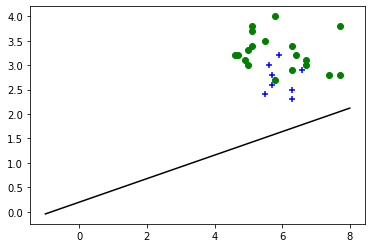

In [72]:
fig = plt.figure()

# ENSURE THAT WHEN YOU ARE DOING YOUR PLOT, YOU PLOT THE GROUNDTRUTH VALUES
positive_samples = h_w_x_df[h_w_x_df["y"]==1]
negative_samples = h_w_x_df[h_w_x_df["y"]==0]

# Plot your positive examples
plt.scatter(positive_samples["x1"],positive_samples["x2"], marker='+', c ='blue')

# Plot your negative examples
plt.scatter(negative_samples["x1"],negative_samples["x2"], c= 'green', marker='o')

w = sgd.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 8)
yy = a * xx - (sgd.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

### plot confusion matrix on testing set no feature scaling

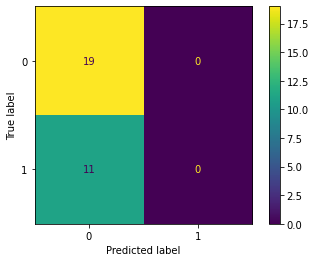

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, h_w_x, labels=sgd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd.classes_)
disp.plot()

## Fit and predict using lbfgs optimizer (without feature scaling)-Training Dataset

In [74]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none').fit(x_train, y_train)

In [76]:
#Training Dataset
training_set_clf = x_train
h_w_x = sgd.predict(training_set_clf)
h_w_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
h_w_x = clf.predict(training_set_clf)
h_w_x_df = pd.DataFrame(np.array(np.transpose([training_set_clf[:,0], training_set_clf[:,1], h_w_x, y_train])),columns=["x1", "x2", "predicted_y", "y"])
h_w_x_df

,x1,x2,predicted_y,y
0,5.8,2.8,0.0,0.0
1,6.0,2.2,1.0,1.0
2,5.5,4.2,0.0,0.0
3,7.3,2.9,0.0,0.0
4,5.0,3.4,0.0,0.0
...,...,...,...,...
115,4.9,2.4,1.0,1.0
116,7.9,3.8,0.0,0.0
117,6.7,3.1,0.0,1.0
118,5.2,4.1,0.0,0.0


In [78]:
# your accuracy should be above 0.65, f1-score above 0.40 and auc above 0.70
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_train, h_w_x, normalize=True)
f1_score = f1_score(y_train, h_w_x)
auc = roc_auc_score(y_train, clf.decision_function(training_set_clf))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")

accuracy: 0.6916666666666667, f1_score: 0.4126984126984126, auc: 0.776511554289332


# Fit and predict using lbfgs optimizer (without feature scaling)-Testing Dataset

In [79]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none').fit(x_test, y_test)

In [80]:
#testing Dataset
testing_set_clf = x_test
h_w_x = sgd.predict(testing_set_clf)
h_w_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
h_w_x = clf.predict(testing_set_clf)
h_w_x_df = pd.DataFrame(np.array(np.transpose([testing_set_clf[:,0], testing_set_clf[:,1], h_w_x, y_test])),columns=["x1", "x2", "predicted_y", "y"])
h_w_x_df

,x1,x2,predicted_y,y
0,5.8,4.0,0.0,0.0
1,7.7,2.8,0.0,0.0
2,5.1,3.8,0.0,0.0
3,4.7,3.2,0.0,0.0
4,7.4,2.8,0.0,0.0
5,5.0,3.3,0.0,0.0
6,6.3,3.4,0.0,0.0
7,5.7,2.8,1.0,1.0
8,5.8,2.7,1.0,1.0
9,5.7,2.6,1.0,1.0


In [82]:
#testing data
#your accuracy should be above 0.70, f1-score above 0.50 and auc above 0.80
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, h_w_x, normalize=True)
f1_score = f1_score(y_test, h_w_x)
auc = roc_auc_score(y_test, clf.decision_function(testing_set_clf))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")

accuracy: 0.8333333333333334, f1_score: 0.7368421052631579, auc: 0.8636363636363636


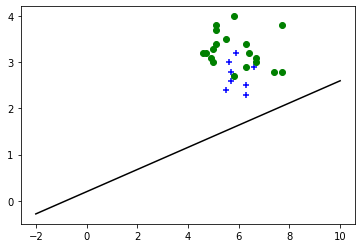

In [83]:
#testing data
fig = plt.figure()

# ENSURE THAT WHEN YOU ARE DOING YOUR PLOT, YOU PLOT THE GROUNDTRUTH VALUES
positive_samples = h_w_x_df[h_w_x_df["y"]==1]
negative_samples = h_w_x_df[h_w_x_df["y"]==0]

# Plot your positive examples
plt.scatter(positive_samples["x1"],positive_samples["x2"], marker='+', c ='blue')

# Plot your negative examples
plt.scatter(negative_samples["x1"],negative_samples["x2"], c= 'green', marker='o')

w = sgd.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 10)
yy = a * xx - (sgd.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

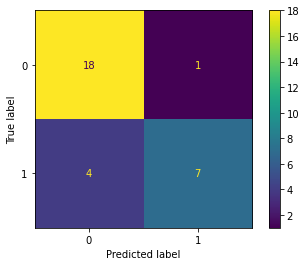

In [84]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, h_w_x, labels=sgd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd.classes_)
disp.plot()

## Feature scaling

(feature scale your data here)

In [91]:
import copy
#iris_df_copy = copy.deepcopy(iris_df)

# Shuffle data
#iris_df_copy = iris_df.sample(frac=1, random_state=0).reset_index(drop=True)

# Grab appropriate columns
#sepal_length_width = np.array(iris_df_copy[["sepal length (cm)", "sepal width (cm)"]])

# Change class 2 to class 0 for Binary Classification
#iris_df_copy[iris_df_copy["target"] == 2] = 0
#target = iris_df_copy["target"]


In [92]:
#target = np.array(iris_df_copy["target"])
#X=sepal_length_width
#Y=target
#X_y_df = pd.DataFrame(np.array(np.transpose([X[:,0], X[:,1], Y])), columns=["sepal length (cm)", "sepal width (cm)", "y_target"])
                                             
#X_y_df

In [93]:
#target = np.array(iris_df_copy["target"])
#X=sepal_petal_length_width
#Y=target
#X_y_df = pd.DataFrame(np.array(np.transpose([X[:,0], X[:,1],X[:,2], X[:,3], Y])), columns=["sepal length (cm)", "sepal width (cm)","petal length (cm)","petal width (cm)", "y_target"])
                                             
#X_y_df

In [95]:
#Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0,shuffle=False)

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)
scaler.fit(x_test)
training_set_x_fs = scaler.transform(x_train)
testing_set_x_fs = scaler.transform(x_test)


# Fit and predict Gradient Descent (with feature scaling)-Training Dataset

In [97]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=150000, tol=1e-3, loss='log', random_state=0, penalty='none').fit(training_set_x_fs,y_train)

In [98]:
#Training Dataset
training_set_sgd = training_set_x_fs
h_w_x = sgd.predict(training_set_sgd)
h_w_x


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [99]:
h_w_x_df = pd.DataFrame(np.array(np.transpose([training_set_sgd[:,0], training_set_sgd[:,1], h_w_x, y_train])),
                        columns=["x1", "x2", "predicted_y", "y"])
h_w_x_df


,x1,x2,predicted_y,y
0,-0.150251,-0.643823,1.0,0.0
1,0.093400,-2.092424,1.0,1.0
2,-0.515728,2.736247,0.0,0.0
3,1.677131,-0.402389,0.0,0.0
4,-1.124855,0.804778,0.0,0.0
...,...,...,...,...
115,-1.246681,-1.609557,1.0,1.0
116,2.408083,1.770513,0.0,0.0
117,0.946178,0.080478,0.0,1.0
118,-0.881204,2.494813,0.0,0.0


# accuracy, f1-score and AUC (Training set) with feature scaling

In [100]:
#your accuracy should be above 0.60, f1-score above 0.40 and auc above 0.65
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_train, h_w_x, normalize=True)
f1_score = f1_score(y_train, h_w_x)
auc = roc_auc_score(y_train, sgd.decision_function(training_set_sgd))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")



accuracy: 0.6416666666666667, f1_score: 0.42666666666666664, auc: 0.7144666033554923


# Fit and predict Gradient Descent (with feature scaling)-Testing Dataset

In [101]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=150000, tol=1e-3, loss='log', random_state=0, penalty='none').fit(testing_set_x_fs,y_test)

In [102]:
testing_set_sgd = testing_set_x_fs
h_w_x = sgd.predict(testing_set_sgd)
h_w_x


array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1])

In [103]:
h_w_x_df = pd.DataFrame(np.array(np.transpose([testing_set_sgd[:,0], testing_set_sgd[:,1], h_w_x, y_test])),
                        columns=["x1", "x2", "predicted_y", "y"])
h_w_x_df

,x1,x2,predicted_y,y
0,-0.150251,2.253380,0.0,0.0
1,2.164432,-0.643823,1.0,0.0
2,-1.003030,1.770513,0.0,0.0
3,-1.490332,0.321911,1.0,0.0
4,1.798956,-0.643823,1.0,0.0
5,-1.124855,0.563345,1.0,0.0
6,0.458876,0.804778,0.0,0.0
7,-0.272077,-0.643823,1.0,1.0
8,-0.150251,-0.885256,1.0,1.0
9,-0.272077,-1.126690,1.0,1.0


### accuracy, f1-score and AUC (Testing set) with feature scaling

In [104]:
#your accuracy should be above 0.75, f1-score above 0.65 and auc above 0.80
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, h_w_x, normalize=True)
f1_score = f1_score(y_test, h_w_x)
auc = roc_auc_score(y_test, sgd.decision_function(testing_set_sgd))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")


accuracy: 0.6, f1_score: 0.6470588235294118, auc: 0.8732057416267942


### plot decision boundary on testing set with feature scaling

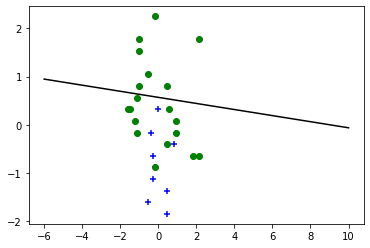

In [105]:
#testing data
fig = plt.figure()

# ENSURE THAT WHEN YOU ARE DOING YOUR PLOT, YOU PLOT THE GROUNDTRUTH VALUES
positive_samples = h_w_x_df[h_w_x_df["y"]==1]
negative_samples = h_w_x_df[h_w_x_df["y"]==0]

# Plot your positive examples
plt.scatter(positive_samples["x1"],positive_samples["x2"], marker='+', c ='blue')

# Plot your negative examples
plt.scatter(negative_samples["x1"],negative_samples["x2"], c= 'green', marker='o')

w = sgd.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-6, 10)
yy = a * xx - (sgd.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

### plot confusion matrix on testing set with feature scaling

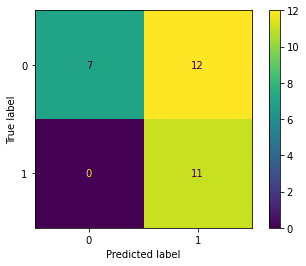

In [106]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, h_w_x, labels=sgd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd.classes_)
disp.plot()

## Fit and predict using lbfgs optimizer (with feature scaling)

In [108]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none').fit(training_set_x_fs, y_train)

### accuracy, f1-score and AUC (Training set) with feature scaling

In [112]:
#Training Dataset
training_set_clf = training_set_x_fs
h_w_x = sgd.predict(training_set_clf)
h_w_x


array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [113]:
h_w_x = clf.predict(training_set_clf)
h_w_x_df = pd.DataFrame(np.array(np.transpose([training_set_clf[:,0], training_set_clf[:,1], h_w_x, y_train])),columns=["x1", "x2", "predicted_y", "y"])
h_w_x_df


,x1,x2,predicted_y,y
0,-0.150251,-0.643823,0.0,0.0
1,0.093400,-2.092424,1.0,1.0
2,-0.515728,2.736247,0.0,0.0
3,1.677131,-0.402389,0.0,0.0
4,-1.124855,0.804778,0.0,0.0
...,...,...,...,...
115,-1.246681,-1.609557,1.0,1.0
116,2.408083,1.770513,0.0,0.0
117,0.946178,0.080478,0.0,1.0
118,-0.881204,2.494813,0.0,0.0


In [114]:
#  your accuracy should be above 0.65, f1-score above 0.40 and auc above 0.70
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_train, h_w_x, normalize=True)
f1_score = f1_score(y_train, h_w_x)
auc = roc_auc_score(y_train, clf.decision_function(training_set_clf))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")


accuracy: 0.6916666666666667, f1_score: 0.4126984126984126, auc: 0.776511554289332


### accuracy, f1-score and AUC (Testing set) with feature scaling

In [115]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none').fit(testing_set_x_fs, y_test)

In [116]:
#Training Dataset
testing_set_clf = testing_set_x_fs
h_w_x = sgd.predict(testing_set_clf)
h_w_x

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1])

In [117]:
h_w_x = clf.predict(testing_set_clf)
h_w_x_df = pd.DataFrame(np.array(np.transpose([testing_set_clf[:,0], testing_set_clf[:,1], h_w_x, y_test])),columns=["x1", "x2", "predicted_y", "y"])
h_w_x_df


,x1,x2,predicted_y,y
0,-0.150251,2.253380,0.0,0.0
1,2.164432,-0.643823,0.0,0.0
2,-1.003030,1.770513,0.0,0.0
3,-1.490332,0.321911,0.0,0.0
4,1.798956,-0.643823,0.0,0.0
5,-1.124855,0.563345,0.0,0.0
6,0.458876,0.804778,0.0,0.0
7,-0.272077,-0.643823,1.0,1.0
8,-0.150251,-0.885256,1.0,1.0
9,-0.272077,-1.126690,1.0,1.0


In [118]:
#  your accuracy should be above 0.70, f1-score above 0.50 and auc above 0.80
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, h_w_x, normalize=True)
f1_score = f1_score(y_test, h_w_x)
auc = roc_auc_score(y_test, clf.decision_function(testing_set_clf))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")


accuracy: 0.8333333333333334, f1_score: 0.7368421052631579, auc: 0.8636363636363636


### plot decision boundary on testing set with feature scaling

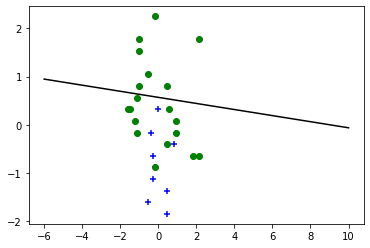

In [119]:
#testing data
fig = plt.figure()

# ENSURE THAT WHEN YOU ARE DOING YOUR PLOT, YOU PLOT THE GROUNDTRUTH VALUES
positive_samples = h_w_x_df[h_w_x_df["y"]==1]
negative_samples = h_w_x_df[h_w_x_df["y"]==0]

# Plot your positive examples
plt.scatter(positive_samples["x1"],positive_samples["x2"], marker='+', c ='blue')

# Plot your negative examples
plt.scatter(negative_samples["x1"],negative_samples["x2"], c= 'green', marker='o')

w = sgd.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-6, 10)
yy = a * xx - (sgd.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')

### plot confusion matrix on testing set with feature scaling

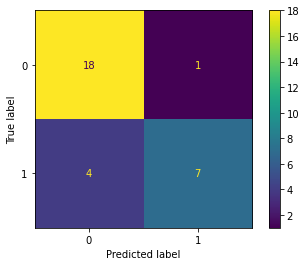

In [120]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, h_w_x, labels=sgd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd.classes_)
disp.plot()

# Multinomial Logistic Regression

(Grab appropriate features and data split)
## No Feature Scaling

In [178]:
import copy
iris_df_copy = copy.deepcopy(iris_df)

# Shuffle data
iris_df_copy = iris_df.sample(frac=1, random_state=0).reset_index(drop=True)

# Grab appropriate columns
sepal_petal_length_width = np.array(iris_df_copy[["sepal length (cm)", "sepal width (cm)","petal length (cm)","petal width (cm)"]])

# Change class 2 to class 0 for Binary Classification
iris_df_copy[iris_df_copy["target"] == 2] = 0
target = iris_df_copy["target"]

In [179]:
target = np.array(iris_df_copy["target"])
X=sepal_petal_length_width
Y=target
X_y_df = pd.DataFrame(np.array(np.transpose([X[:,0], X[:,1],X[:,2], X[:,3], Y])), columns=["sepal length (cm)", "sepal width (cm)","petal length (cm)","petal width (cm)", "y_target"])
                                             
X_y_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_target
0,5.8,2.8,5.1,2.4,0.0
1,6.0,2.2,4.0,1.0,1.0
2,5.5,4.2,1.4,0.2,0.0
3,7.3,2.9,6.3,1.8,0.0
4,5.0,3.4,1.5,0.2,0.0
...,...,...,...,...,...
145,4.9,3.1,1.5,0.1,0.0
146,6.3,2.9,5.6,1.8,0.0
147,5.8,2.7,4.1,1.0,1.0
148,7.7,3.8,6.7,2.2,0.0


In [180]:
#Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0,shuffle=True)

## Fit and predict Gradient Descent (without feature scaling)

In [181]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=160000, tol=1e-3, loss='log', random_state=0, penalty='none').fit(x_train, y_train)

In [182]:
#Training Dataset
training_set_sgd = x_train
h_w_x = sgd.predict(training_set_sgd)
h_w_x


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [185]:
#h_w_x_df = pd.DataFrame(np.array(np.transpose([training_set_sgd[:,0], training_set_sgd[:,1], training_set_sgd[:,2], training_set_sgd[:,3], h_w_x, y_train])), 
                        #columns=["x1", "x2", "x3","x4", "predicted_y", "y"])
#h_w_x_df


### accuracy(Training set) No feature scaling

In [186]:
#your accuracy should be above 0.70
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_train, h_w_x, normalize=True)
f1_score = f1_score(y_train, h_w_x)
auc = roc_auc_score(y_train, sgd.decision_function(training_set_sgd))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")

accuracy: 0.7083333333333334, f1_score: 0.4776119402985074, auc: 0.815018315018315


### accuracy(Testing set) No feature scaling

In [187]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=150000, tol=1e-3, loss='log', random_state=0, penalty='none').fit(x_test, y_test)

In [188]:
#Training Dataset
testing_set_sgd = x_test
h_w_x = sgd.predict(testing_set_sgd)
h_w_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [190]:
#h_w_x_df = pd.DataFrame(np.array(np.transpose([testing_set_sgd[:,0], testing_set_sgd[:,1], testing_set_sgd[:,2], testing_set_sgd[:,3], h_w_x, y_test])), 
                        #columns=["x1", "x2", "x3","x4", "predicted_y", "y"])
#h_w_x_df


In [191]:
#- your accuracy should be above 0.75
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, h_w_x, normalize=True)
f1_score = f1_score(y_test, h_w_x)
auc = roc_auc_score(y_test, sgd.decision_function(testing_set_sgd))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")

accuracy: 0.7333333333333333, f1_score: 0.0, auc: 0.5852272727272727


## Fit and predict using lbfgs optimizer (without feature scaling)

In [202]:
#Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0,shuffle=True)

In [203]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=160000, random_state=0, solver='lbfgs', penalty='none').fit(x_train, y_train)


### accuracy(Training set) No feature scaling

In [204]:
#Training Dataset
training_set_clf = x_train
h_w_x = sgd.predict(training_set_clf)
h_w_x


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [205]:
#h_w_x = clf.predict(training_set_clf)
#h_w_x_df = pd.DataFrame(np.array(np.transpose([x_train[:,0], x_train[:,1],x_train[:,2], x_train[:,3], h_w_x, y_train])),columns=["x1", "x2", "x3", "x4", "predicted_y", "y"])
#h_w_x_df


In [206]:
# your accuracy should be above 0.95
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_train, h_w_x, normalize=True)
f1_score = f1_score(y_train, h_w_x)
auc = roc_auc_score(y_train, clf.decision_function(training_set_clf))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")



accuracy: 0.65, f1_score: 0.0, auc: 0.8253968253968254


### accuracy(Testing set) No feature scaling

In [207]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=160000,random_state=0, solver='lbfgs', penalty='none').fit(x_test, y_test)

In [208]:
#Training Dataset
testing_set_clf = x_test
h_w_x = sgd.predict(testing_set_clf)
h_w_x


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [209]:
#h_w_x = clf.predict(testing_set_clf)
#h_w_x_df = pd.DataFrame(np.array(np.transpose([testing_set_clf[:,0], testing_set_clf[:,1],testing_set_clf[:,2], testing_set_clf[:,3], h_w_x, y_test])),columns=["x1", "x2", "x3", "x4", "predicted_y", "y"])
#h_w_x_df


,x1,x2,x3,x4,predicted_y,y
0,7.7,2.6,6.9,2.3,1.0,0.0
1,5.8,2.7,5.1,1.9,0.0,0.0
2,6.1,3.0,4.9,1.8,0.0,0.0
3,5.2,3.4,1.4,0.2,0.0,0.0
4,6.7,3.1,4.7,1.5,0.0,1.0
5,4.4,3.0,1.3,0.2,0.0,0.0
6,6.8,3.0,5.5,2.1,0.0,0.0
7,6.4,2.8,5.6,2.1,0.0,0.0
8,5.9,3.0,5.1,1.8,0.0,0.0
9,5.7,3.0,4.2,1.2,1.0,1.0


In [210]:
# your accuracy should be above 0.90
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, h_w_x, normalize=True)
f1_score = f1_score(y_test, h_w_x)
auc = roc_auc_score(y_test, clf.decision_function(testing_set_clf))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")


accuracy: 0.8, f1_score: 0.5714285714285715, auc: 0.8806818181818181


## Feature scaling-Multinomial Logistic Regression

(feature scale your data here)

In [211]:
import copy
iris_df_copy = copy.deepcopy(iris_df)

# Shuffle data
iris_df_copy = iris_df.sample(frac=1, random_state=0).reset_index(drop=True)

# Grab appropriate columns
sepal_petal_length_width = np.array(iris_df_copy[["sepal length (cm)", "sepal width (cm)","petal length (cm)","petal width (cm)"]])

# Change class 2 to class 0 for Binary Classification
iris_df_copy[iris_df_copy["target"] == 2] = 0
target = iris_df_copy["target"]

In [212]:
target = np.array(iris_df_copy["target"])
X=sepal_petal_length_width
Y=target
X_y_df = pd.DataFrame(np.array(np.transpose([X[:,0], X[:,1],X[:,2], X[:,3], Y])), columns=["sepal length (cm)", "sepal width (cm)","petal length (cm)","petal width (cm)", "y_target"])
                                             
X_y_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_target
0,5.8,2.8,5.1,2.4,0.0
1,6.0,2.2,4.0,1.0,1.0
2,5.5,4.2,1.4,0.2,0.0
3,7.3,2.9,6.3,1.8,0.0
4,5.0,3.4,1.5,0.2,0.0
...,...,...,...,...,...
145,4.9,3.1,1.5,0.1,0.0
146,6.3,2.9,5.6,1.8,0.0
147,5.8,2.7,4.1,1.0,1.0
148,7.7,3.8,6.7,2.2,0.0


In [213]:
#Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0,shuffle=True)

In [219]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)
scaler.fit(x_test)
training_set_x_fs = scaler.transform(x_train)
testing_set_x_fs = scaler.transform(x_test)

## Fit and predict Gradient Descent (with feature scaling)

In [220]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=50000, tol=1e-3, loss='log', random_state=0, penalty='none').fit(training_set_x_fs,y_train)

In [221]:
#Training Dataset
training_set_sgd = training_set_x_fs
h_w_x = sgd.predict(training_set_sgd)
h_w_x

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [222]:
h_w_x_df = pd.DataFrame(np.array(np.transpose([training_set_sgd[:,0], training_set_sgd[:,1],training_set_sgd[:,2], training_set_sgd[:,3], h_w_x, y_train])),
                        columns=["x1", "x2","x2", "x3", "predicted_y", "y"])
h_w_x_df


,x1,x2,x2,x3,predicted_y,y
0,-0.135561,-0.837769,0.644019,0.819167,1.0,0.0
1,1.107080,0.304643,0.973347,1.331147,0.0,0.0
2,0.316308,-0.380804,0.204915,0.051198,1.0,1.0
3,-0.248528,-0.609286,0.095139,0.051198,1.0,1.0
4,0.429276,-1.294733,0.534243,0.307188,1.0,1.0
...,...,...,...,...,...,...
115,0.203341,-0.609286,0.040251,0.051198,1.0,1.0
116,0.994112,0.304643,1.083123,1.331147,0.0,0.0
117,1.445982,0.304643,1.138011,0.691173,0.0,0.0
118,0.881145,0.076161,0.259803,0.179193,0.0,1.0


### accuracy (Training set) with feature scaling

In [224]:

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_train, h_w_x, normalize=True)
f1_score = f1_score(y_train, h_w_x)
auc = roc_auc_score(y_train, sgd.decision_function(training_set_sgd))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")


accuracy: 0.7166666666666667, f1_score: 0.6136363636363638, auc: 0.793956043956044


### accuracy (Testing set) with feature scaling

In [225]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=150000, tol=1e-3, loss='log', random_state=0, penalty='none').fit(testing_set_x_fs,y_test)

In [226]:
#Testing Dataset
testing_set_sgd = testing_set_x_fs
h_w_x = sgd.predict(testing_set_sgd)
h_w_x

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0])

In [228]:
h_w_x_df = pd.DataFrame(np.array(np.transpose([testing_set_sgd[:,0], testing_set_sgd[:,1],testing_set_sgd[:,2], testing_set_sgd[:,3], h_w_x, y_test])),
                        columns=["x1", "x2","x2", "x3", "predicted_y", "y"])
h_w_x_df


,x1,x2,x2,x3,predicted_y,y
0,2.010818,-1.066251,1.632003,1.331147,1.0,0.0
1,-0.135561,-0.837769,0.644019,0.819167,1.0,0.0
2,0.203341,-0.152322,0.534243,0.691173,0.0,0.0
3,-0.813365,0.761608,-1.386837,-1.356746,0.0,0.0
4,0.881145,0.076161,0.424467,0.307188,0.0,1.0
5,-1.717103,-0.152322,-1.441725,-1.356746,0.0,0.0
6,0.994112,-0.152322,0.863571,1.075157,0.0,0.0
7,0.542243,-0.609286,0.918459,1.075157,1.0,0.0
8,-0.022593,-0.152322,0.644019,0.691173,1.0,0.0
9,-0.248528,-0.152322,0.150027,-0.076797,1.0,1.0


In [230]:

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, h_w_x, normalize=True)
f1_score = f1_score(y_test, h_w_x)
auc = roc_auc_score(y_test, sgd.decision_function(testing_set_sgd))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")

accuracy: 0.7, f1_score: 0.608695652173913, auc: 0.8181818181818181


## Fit and predict lbfgs optimizer (with feature scaling)

In [235]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none').fit(training_set_x_fs, y_train)


In [237]:
#Training Dataset
training_set_clf = training_set_x_fs
#h_w_x = sgd.predict(training_set_clf)
#h_w_x

In [238]:
h_w_x = clf.predict(training_set_x_fs)
h_w_x_df = pd.DataFrame(np.array(np.transpose([training_set_clf[:,0], training_set_clf[:,1],training_set_clf[:,2], training_set_clf[:,3], h_w_x, y_train])),columns=["x1", "x2", "x3", "x4", "predicted_y", "y"])
h_w_x_df


,x1,x2,x3,x4,predicted_y,y
0,-0.135561,-0.837769,0.644019,0.819167,0.0,0.0
1,1.107080,0.304643,0.973347,1.331147,0.0,0.0
2,0.316308,-0.380804,0.204915,0.051198,0.0,1.0
3,-0.248528,-0.609286,0.095139,0.051198,0.0,1.0
4,0.429276,-1.294733,0.534243,0.307188,1.0,1.0
...,...,...,...,...,...,...
115,0.203341,-0.609286,0.040251,0.051198,0.0,1.0
116,0.994112,0.304643,1.083123,1.331147,0.0,0.0
117,1.445982,0.304643,1.138011,0.691173,0.0,0.0
118,0.881145,0.076161,0.259803,0.179193,0.0,1.0


### accuracy(Training set) with feature scaling

In [239]:


from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_train, h_w_x, normalize=True)
f1_score = f1_score(y_train, h_w_x)
auc = roc_auc_score(y_train, clf.decision_function(training_set_clf))

print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")


accuracy: 0.7166666666666667, f1_score: 0.5641025641025642, auc: 0.8253968253968254


### accuracy(Testing set) with feature scaling

In [240]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none').fit(testing_set_x_fs, y_test)

In [242]:
testing_set_clf = testing_set_x_fs

In [244]:
h_w_x = clf.predict(testing_set_x_fs)
h_w_x_df = pd.DataFrame(np.array(np.transpose([testing_set_clf[:,0], testing_set_clf[:,1],testing_set_clf[:,2], testing_set_clf[:,3], h_w_x, y_test])),columns=["x1", "x2", "x3", "x4", "predicted_y", "y"])
h_w_x_df


,x1,x2,x3,x4,predicted_y,y
0,2.010818,-1.066251,1.632003,1.331147,1.0,0.0
1,-0.135561,-0.837769,0.644019,0.819167,0.0,0.0
2,0.203341,-0.152322,0.534243,0.691173,0.0,0.0
3,-0.813365,0.761608,-1.386837,-1.356746,0.0,0.0
4,0.881145,0.076161,0.424467,0.307188,0.0,1.0
5,-1.717103,-0.152322,-1.441725,-1.356746,0.0,0.0
6,0.994112,-0.152322,0.863571,1.075157,0.0,0.0
7,0.542243,-0.609286,0.918459,1.075157,0.0,0.0
8,-0.022593,-0.152322,0.644019,0.691173,0.0,0.0
9,-0.248528,-0.152322,0.150027,-0.076797,1.0,1.0


In [245]:
# your accuracy should be above 0.90
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, h_w_x, normalize=True)
f1_score = f1_score(y_test, h_w_x)
auc = roc_auc_score(y_test, clf.decision_function(testing_set_clf))
testing_set_clf
print(f"accuracy: {accuracy}, f1_score: {f1_score}, auc: {auc}")


accuracy: 0.8, f1_score: 0.5714285714285715, auc: 0.8806818181818181
